### Titanic Machine Learning
###### [Mission] predicting survived feature for survival or not<br>[Data]<br>1) Train: various features for passangers(name, sex, age...)<br>2) Test

### Prepare data

In [2]:
# base
import pandas as pd
import numpy as np
import random as rand

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# acquire data
submission_data = pd.read_csv('C:/Users/1004/git/kaggle/Titanic/gender_submission.csv')
test_data = pd.read_csv('C:/Users/1004/git/kaggle/Titanic/test.csv')
train_data = pd.read_csv('C:/Users/1004/git/kaggle/Titanic/train.csv')
combine = [train_data, test_data]

### Analyze by describing data

In [2]:
# feature type
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


<h6>
* Note(feature summary)<br>
Survived: survival(1) or not(0)<br>
Pclass: ticket class(1=1st, 2=2nd, 3=3rd)<br>
Sex: male or female<br>
Age<br>
SibSp: Sibling or Spouse<br>
Parch: Parent or Children<br>
Ticket: number of Ticket<br>
Cabin: room number<br>
Embarked: boarding port<br>
</h6>

In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###### * Note(feature type)<br> Categorical = Survived, Sex, Embarked <br> Ordinal = Pclass <br> Continous = Age, Fare <br> Discrete = SibSp, Parch <br> mixed = Ticket, Cabin <br> contain errors or typos = Name

In [6]:
# check null, type
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### * Note <br> null: Cabin > Age > Embarked

In [7]:
# distribution features
train_data.info()
print('_'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### * Note <br>PassengerId: X<br>Survived: survived 38%<br>Pclass: 3 Pclass 50%<br>Age: Few elderly passengers<br>SibSp: Nearly 30% passenger had SibSp<br>Parch: Most passenger(>75%) didn't trvavel with parch<br>Fare: fares varied  

In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


###### * Note<br>Name: unique 891<br>Sex: male 65%<br>Ticket: 22% of duplicate values(unique = 681)<br>Cabin: several passengers shared a cabin<br>Embarked: S port used by most passengers

### Assumtions based on data analysis
<h6>
* <span style="font-weight: bold">Correlating</span>: how well does each feature correlate with Survival<br>
* <span style="font-weight: bold">Correcting</span>:<br>
    1) Ticket feature may be dropped: Ticket and survival doesn't have correlation(as it contains high ratio of duplicates(22%))<br>
    2) Cabin feature may be dropped: highly incomplete or contains many null values(both in training and test dataset)<br>
    3) PassengerId may be dropped: does not contribute to survival<br>
    4) Name mat be dropped: relatively non-standard, may not contribite directly to survival<br>
* <span style="font-weight: bold">Creating</span>:<br>
    1) create a new feature called Family: based on Parch and SibSp<br>
    2) extract a new feature called Title: engineer the Name feature<br>
    3) create a new feature for Age bands: numerical -> ordinal<br>
    4) create a Fare range feature<br>
* <span style="font-weight: bold">Classifying</span>:<br>
    1) Women(Sex=female) were more likely to have survived<br>
    2) Children(Age<()) were more likely to have survived<br>
    3) The upper-class passengers(Pclass=1) were more likely to have survived<br>
</h6>

### Analyze by pivoting featrues

In [10]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Analyze by visualizing data

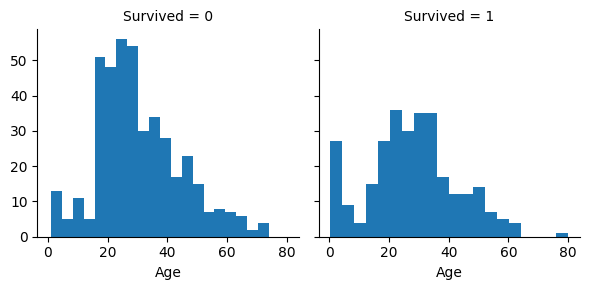

In [14]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


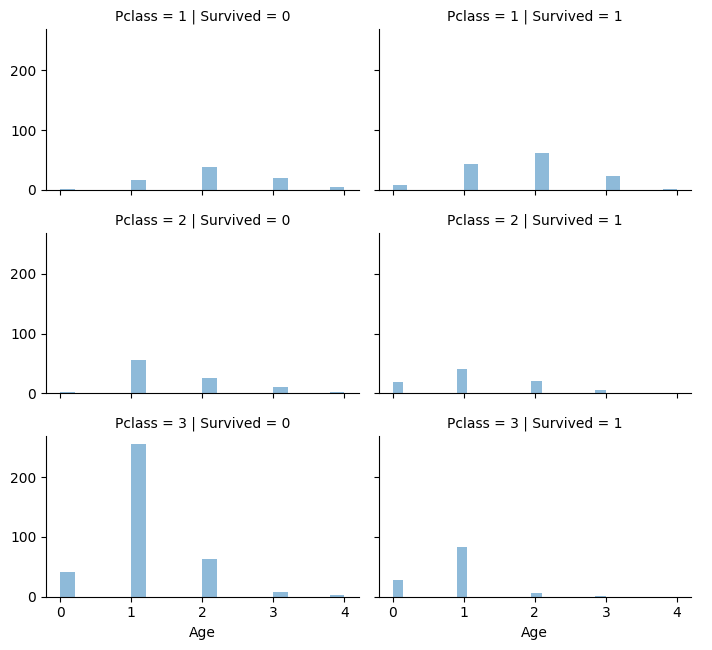

In [57]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


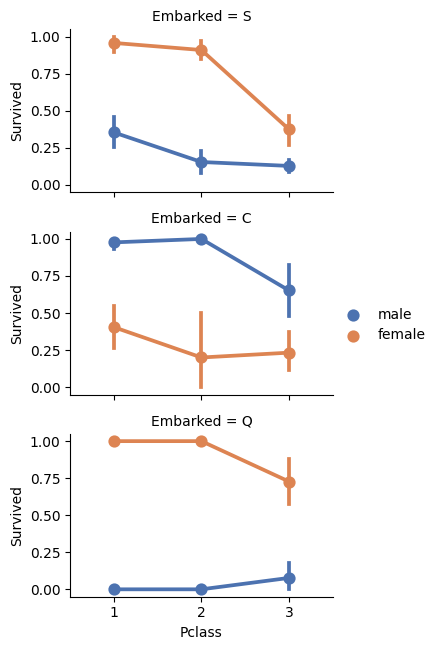

In [59]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


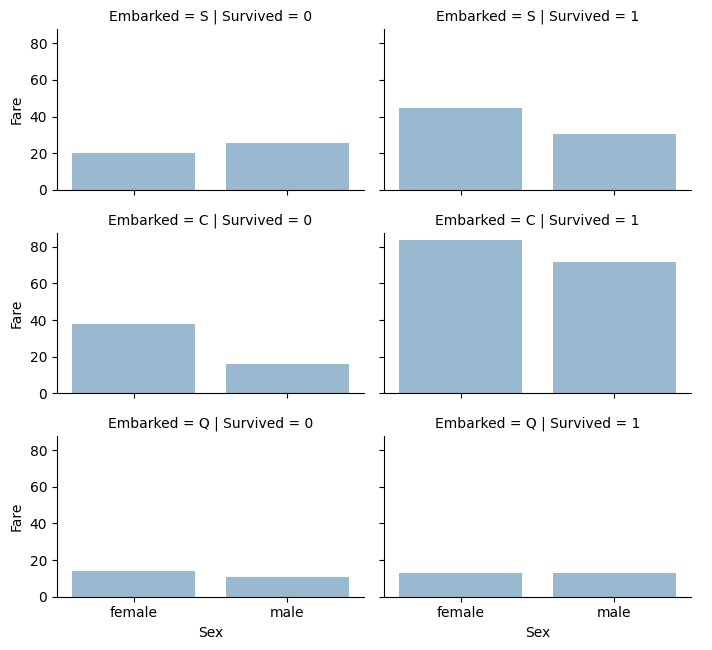

In [60]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

###### * Note(decisions)<br>1) Consider Age, Pclass, Sex, Embarked for model training<br>2) Complete Age, Embarked feature for null values<br>3) Should band age groups and consider banding Fare feature<br>

### Wrangle data

In [20]:
# Correcting by dropping features
print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)
train_data = train_data.drop(['Ticket', 'Cabin'], axis = 1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_data, test_data]
print("After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [21]:
# Creating new feature extracting from existing
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',
                                                 'Don','Dr','Major','Mlle','Mme','Ms','Rev','Sir','Jonkheer','Dona'], 'Rare')
train_data[['Title','Survived']].groupby(['Title'],as_index=False).mean()                                                 

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.444444


In [23]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
train_data = train_data.drop(['Name','PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

In [25]:
# Converting a categorical feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [26]:
# Completing a numerical continuous feature
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [27]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex']==i) &
                                 (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_data.median()
            # convert random age float to nearest .5
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
            # array i(Sex) and j(Pclass)
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)
                        &(dataset.Pclass==j+1), 'Age'] = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [29]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [31]:
train_data = train_data.drop(['AgeBand'], axis = 1)
combine = [train_data, test_data] #?why
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [32]:
# create new feature combining existing features
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [33]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [34]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [35]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [36]:
# Completing a categorical feature
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
# converting categorical feature to numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [39]:
# quick completing and converting a numertic feature
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace = True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [40]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [41]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 1.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis = 1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [42]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


### Model, predict and solve

<h6>* Note<br>
- indentify relationship between output(Survived or not) with other features<br>
- use classification and regression model<br>
- ex) Logistic Regression, KNN, SVM, Naive Bayes Classifier, Decision Tree, Random Forrest, Perception, Artificial neural network, RVM...
</h6>

In [43]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [44]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
acc_logreg

81.37

In [45]:
coeff = pd.DataFrame(train_data.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])
coeff.sort_values(by = "Correlation", ascending = False)

,Feature,Correlation
1,Sex,2.192770
5,Title,0.408567
4,Embarked,0.276401
6,IsAlone,0.180594
7,Age*Class,-0.051593
3,Fare,-0.073133
2,Age,-0.464106
0,Pclass,-1.195452


In [46]:
# SupportVector Machines
# svc = SVC()
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
# acc_svc

82.6

In [47]:
# KNN
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# acc_knn

83.16

In [48]:
# Gaussian Naive Bayes
# gnb = GaussianNB()
# gnb.fit(X_train, Y_train)
# Y_pred = gnb.predict(X_test)
# acc_gnb = round(gnb.score(X_train, Y_train) * 100 , 2)
# acc_gnb

76.88

In [49]:
# Perceptron
# perc = Perceptron()
# perc.fit(X_train, Y_train)
# Y_pred = perc.predict(X_test)
# acc_perc = round(perc.score(X_train, Y_train) * 100, 2)
# acc_perc

77.44

In [50]:
# Linear SVC
# lin_svc = LinearSVC()
# lin_svc.fit(X_train, Y_train)
# Y_pred = lin_svc.predict(X_test)
# acc_lin_svc = round(lin_svc.score(X_train, Y_train) * 100 , 2)
# acc_lin_svc

c:\Users\1004\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.46

In [51]:
# Stochastic Gradient Descent
# sgd = SGDClassifier()
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
# acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
# acc_sgd

79.35

In [52]:
# Decision Tree
# dtree = DecisionTreeClassifier()
# dtree.fit(X_train, Y_train)
# Y_pred = dtree.predict(X_test)
# acc_dtree = round(dtree.score(X_train, Y_train) * 100, 2)
# acc_dtree

86.64

In [53]:
# Random Forest
ranfor = RandomForestClassifier(n_estimators = 100)
ranfor.fit(X_train, Y_train)
Y_pred = ranfor.predict(X_test)
acc_ranfor = round(ranfor.score(X_train, Y_train) * 100, 2)
acc_ranfor

86.64

In [54]:
models = pd.DataFrame({'Model' : ['SVM', 'KNN', 'Logistic Regreesion', 'Random Forest', 'Naive Bayes', 'Perception', 'Stochastic Gradient Decent', 'Linear SVC', 'Devision Tree'],
                        'Score': [acc_svc, acc_knn, acc_logreg, acc_ranfor, acc_gnb, acc_perc, acc_sgd, acc_lin_svc, acc_dtree]})
models.sort_values(by = 'Score', ascending = False)                        

,Model,Score
3,Random Forest,86.64
8,Devision Tree,86.64
1,KNN,83.16
0,SVM,82.60
2,Logistic Regreesion,81.37
7,Linear SVC,79.46
6,Stochastic Gradient Decent,79.35
5,Perception,77.44
4,Naive Bayes,76.88


In [55]:
submission = pd.DataFrame({"PassengerId" : test_data["PassengerId"], "Survived": Y_pred})
#submission.to_csv('C:/Users/1004/git/kaggle/gender_submission.csv', index = False)

In [56]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


###### * 아래 링크를 참고 했으며, 개인적인 공부를 위한 코드입니다.<br>참고) https://www.kaggle.com/code/startupsci/titanic-data-science-solutions